### Getting Familiar With NLTK and Spacy librabies

In [11]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# text from some bankrupt company
text = """We have examined the compliance of Corporate Governance by ABG Shipyard Limited for the year ended on 31 March 2013, as 
stipulated in Clause 49 of the Listing Agreement of the said Company with the Stock Exchanges.
The compliance of conditions of Corporate Governance is the responsibility of the Management. Our examination has been limited 
to a review of the procedures and implementations thereof adopted by the Company for ensuring compliance with the conditions of 
the Corporate Governance as stipulated in the said Clause. It is neither an audit nor an expression of opinion on the financial 
statement of the Company.
In our opinion and to the best of our information and according to the explanations given to us, and based on the representations 
made by the Directors and the Management, we certify that the Company has complied with the conditions of Corporate 
Governance as stipulated in Clause 49 of the above mentioned Listing Agreement.
We state that such compliance is neither an assurance as to the future viability of the Company, nor of the efficiency with which the 
Management has conducted the affairs of the Company."""

[nltk_data] Downloading package punkt to /home/vijay/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/vijay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/vijay/nltk_data...


In [4]:
# sentence level and word level tokenization
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist

word_tokenized = word_tokenize(text)
sent_tokenized = sent_tokenize(text)
fd = FreqDist(word_tokenized)

In [6]:
print("Sentence tokenization: \n", sent_tokenized, '\n')
print("word_tokenized: \n", word_tokenized[:30], '\n')
print("most frequent words: \n", fd.most_common(3), '\n')

Sentence tokenization: 
 ['We have examined the compliance of Corporate Governance by ABG Shipyard Limited for the year ended on 31 March 2013, as \nstipulated in Clause 49 of the Listing Agreement of the said Company with the Stock Exchanges.', 'The compliance of conditions of Corporate Governance is the responsibility of the Management.', 'Our examination has been limited \nto a review of the procedures and implementations thereof adopted by the Company for ensuring compliance with the conditions of \nthe Corporate Governance as stipulated in the said Clause.', 'It is neither an audit nor an expression of opinion on the financial \nstatement of the Company.', 'In our opinion and to the best of our information and according to the explanations given to us, and based on the representations \nmade by the Directors and the Management, we certify that the Company has complied with the conditions of Corporate \nGovernance as stipulated in Clause 49 of the above mentioned Listing Agreement.

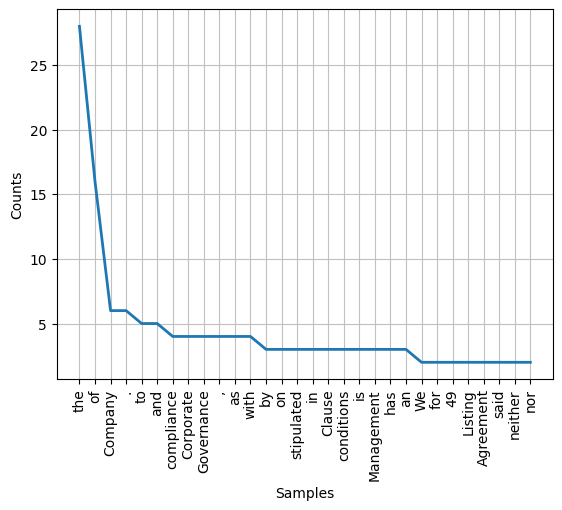

In [7]:
from matplotlib import pyplot as plt
fd.plot(30, cumulative=False)
plt.show()

filtered words: 
 ['examined', 'compliance', 'Corporate', 'Governance', 'ABG', 'Shipyard', 'Limited', 'year', 'ended', '31', 'March', '2013', ',', 'stipulated', 'Clause', '49', 'Listing', 'Agreement', 'said', 'Company', 'Stock', 'Exchanges', '.', 'compliance', 'conditions', 'Corporate', 'Governance', 'responsibility', 'Management', '.'] 



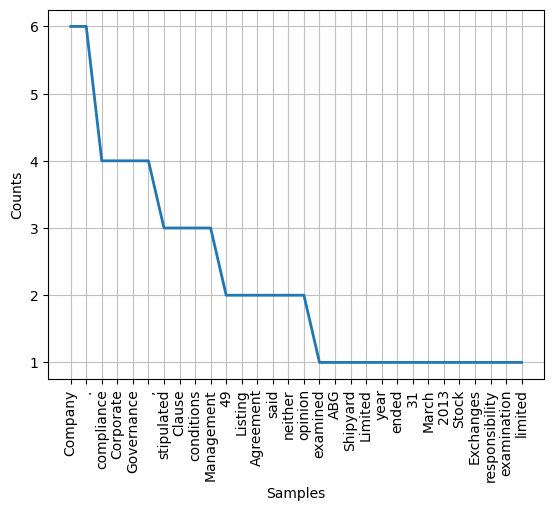

In [10]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in word_tokenized if word.lower() not in stop_words]

print("filtered words: \n", filtered_words[:30], '\n')
fd = FreqDist(filtered_words)
from matplotlib import pyplot as plt
fd.plot(30, cumulative=False)
plt.show()

In [35]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

for words in filtered_words[30:50]:
    print("stemmed: ", stemmer.stem(words), "\tlemmatized: ", lemmatizer.lemmatize(words))
    
# print(stemmer.__doc__)

stemmed:  examin 	lemmatized:  examination
stemmed:  limit 	lemmatized:  limited
stemmed:  review 	lemmatized:  review
stemmed:  procedur 	lemmatized:  procedure
stemmed:  implement 	lemmatized:  implementation
stemmed:  thereof 	lemmatized:  thereof
stemmed:  adopt 	lemmatized:  adopted
stemmed:  compani 	lemmatized:  Company
stemmed:  ensur 	lemmatized:  ensuring
stemmed:  complianc 	lemmatized:  compliance
stemmed:  condit 	lemmatized:  condition
stemmed:  corpor 	lemmatized:  Corporate
stemmed:  govern 	lemmatized:  Governance
stemmed:  stipul 	lemmatized:  stipulated
stemmed:  said 	lemmatized:  said
stemmed:  claus 	lemmatized:  Clause
stemmed:  . 	lemmatized:  .
stemmed:  neither 	lemmatized:  neither
stemmed:  audit 	lemmatized:  audit
stemmed:  express 	lemmatized:  expression


In [22]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
for sent in sent_tokenized:
    print(sent , ":" , sia.polarity_scores(sent), '\n')

We have examined the compliance of Corporate Governance by ABG Shipyard Limited for the year ended on 31 March 2013, as 
stipulated in Clause 49 of the Listing Agreement of the said Company with the Stock Exchanges. : {'neg': 0.047, 'neu': 0.873, 'pos': 0.08, 'compound': 0.3182} 

The compliance of conditions of Corporate Governance is the responsibility of the Management. : {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} 

Our examination has been limited 
to a review of the procedures and implementations thereof adopted by the Company for ensuring compliance with the conditions of 
the Corporate Governance as stipulated in the said Clause. : {'neg': 0.054, 'neu': 0.886, 'pos': 0.06, 'compound': 0.0516} 

It is neither an audit nor an expression of opinion on the financial 
statement of the Company. : {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} 

In our opinion and to the best of our information and according to the explanations given to us, and based on the representa

In [29]:
from nltk.corpus import wordnet

syn = wordnet.synsets('NLP')
print(syn[0].definition())

the branch of information science that deals with natural language information
